# Challenge Accepted

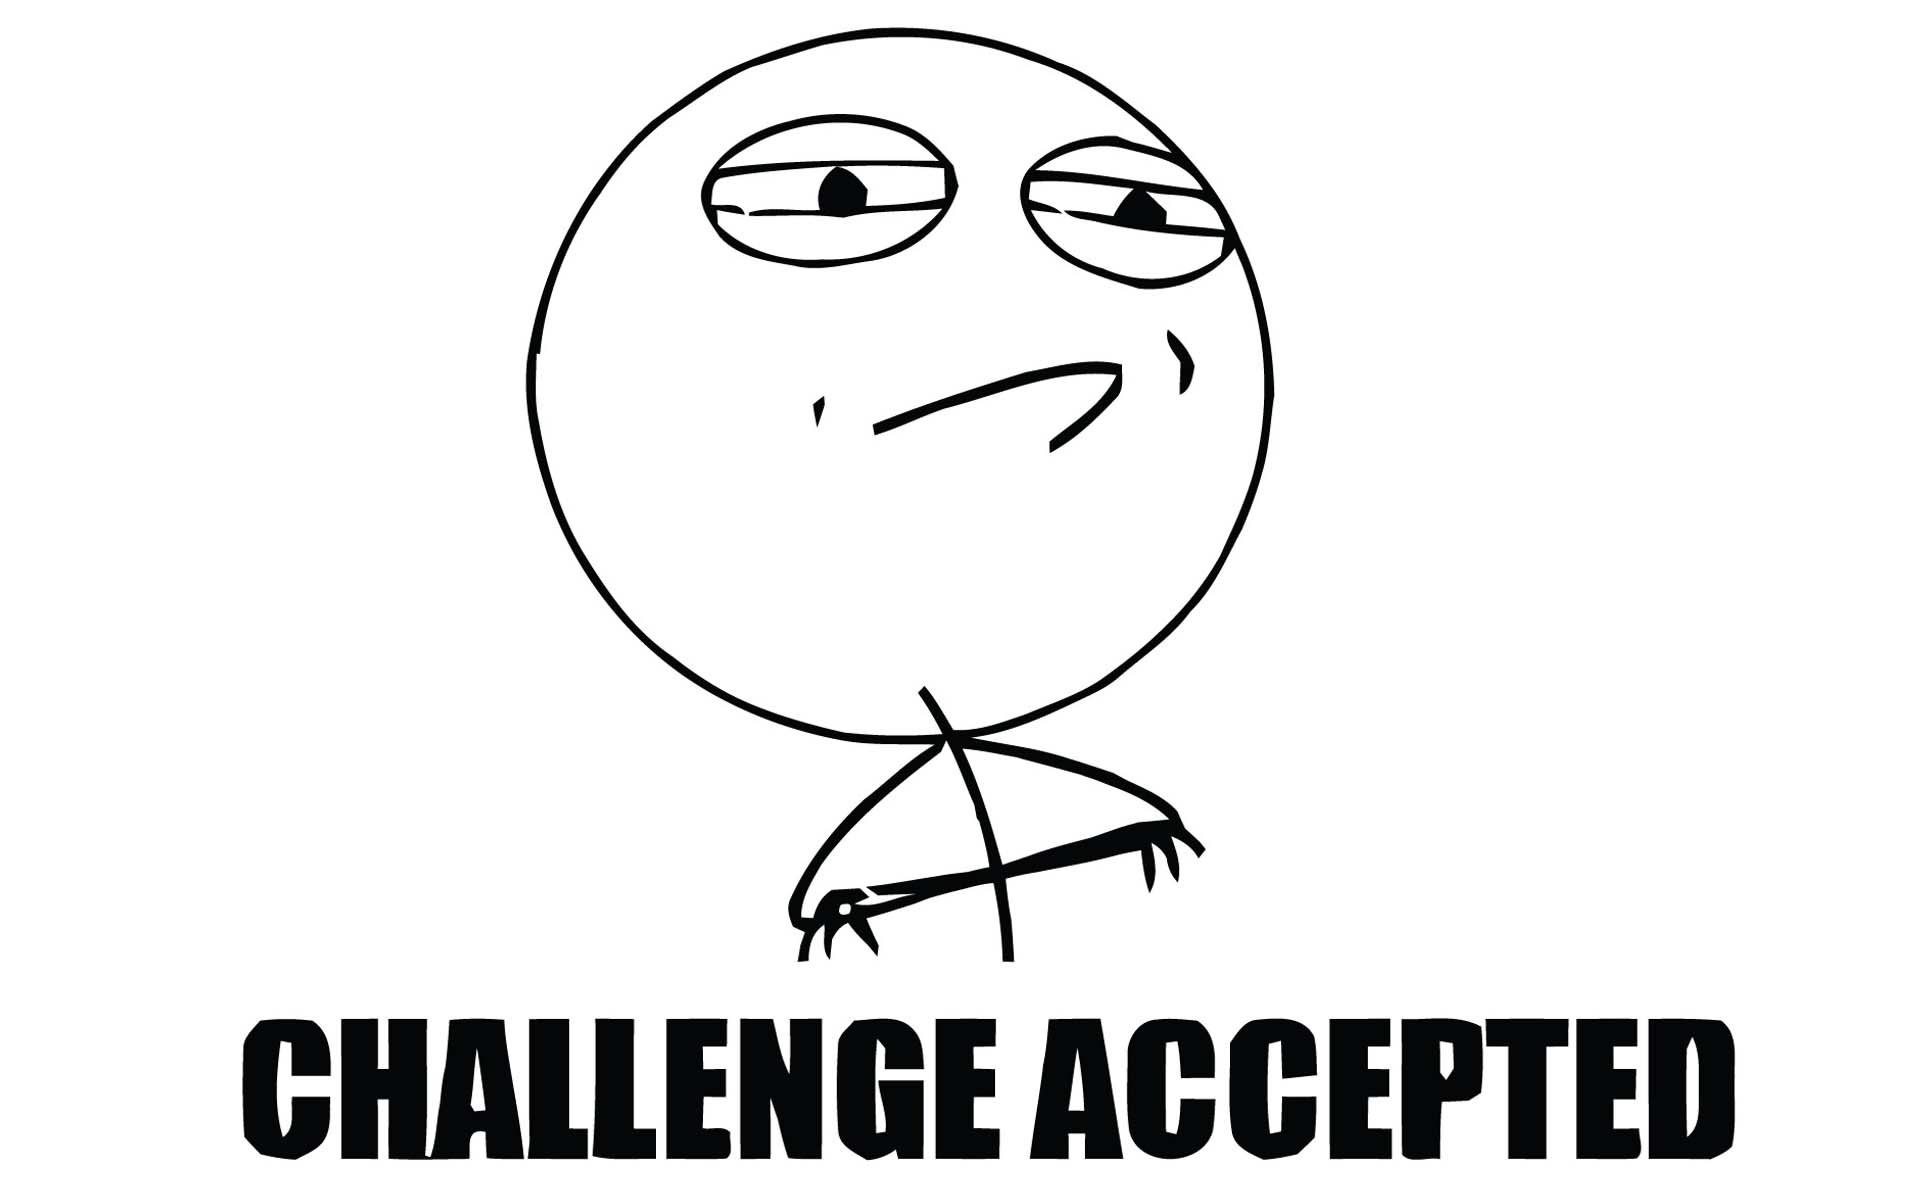

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse = "Mouse_metadata.csv"
study = "Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse)
study = pd.read_csv(study)

# Combine the data into a single dataset
mouse = mouse.merge(study,how='left', on=['Mouse ID'])
#mouse.to_csv('mouse.csv')

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen = pd.DataFrame(mouse.groupby('Drug Regimen').count())
regimen = regimen.reset_index(inplace=False)

drugs =[]
means =[]
median =[]
var=[]
std=[]
sem=[]

for index,row in regimen['Drug Regimen'].iteritems():
        x = mouse.loc[(mouse['Drug Regimen']==row),['Tumor Volume (mm3)']]
        x = x['Tumor Volume (mm3)'].mean()
        
        y = mouse.loc[(mouse['Drug Regimen']==row),['Tumor Volume (mm3)']]
        y = y['Tumor Volume (mm3)'].median() 
        
        z = mouse.loc[(mouse['Drug Regimen']==row),['Tumor Volume (mm3)']]
        z = z['Tumor Volume (mm3)'].var()
        
        a = mouse.loc[(mouse['Drug Regimen']==row),['Tumor Volume (mm3)']]
        a = a['Tumor Volume (mm3)'].std()
        
        b = mouse.loc[(mouse['Drug Regimen']==row),['Tumor Volume (mm3)']]
        b = b['Tumor Volume (mm3)'].sem()
        
        means.append(x)
        median.append(y)
        var.append(z)
        std.append(a)
        sem.append(b)
        drugs.append(row)

statistics = pd.DataFrame({
    
    'Drug': drugs,
    'Mean': means,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'Standard Error of the Mean': sem
    
})

statistics


,Drug,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

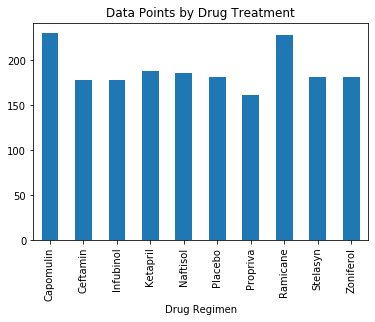

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen.plot.bar(x='Drug Regimen',y='Mouse ID',title = 'Data Points by Drug Treatment',legend=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

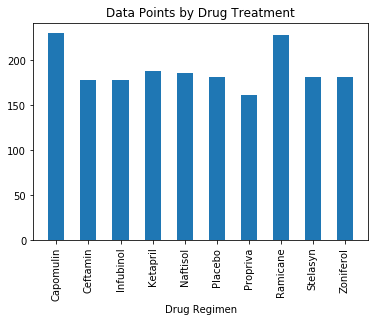

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = regimen['Drug Regimen']
y_axis = regimen['Mouse ID']

plt.bar(x_axis,y_axis,width =.5)
plt.title('Data Points by Drug Treatment')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

## Pie plots

In [5]:
sex = mouse.groupby('Sex').count()
sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


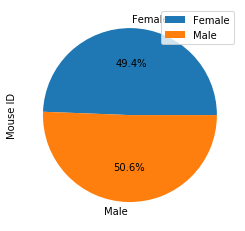

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex.plot.pie(y='Mouse ID',autopct = '%1.1f%%')

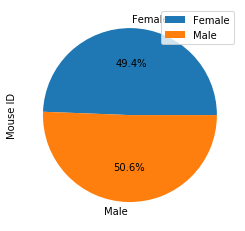

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m = sex['Mouse ID']
labels = ['Female','Male']

plt.pie(m,labels=labels,autopct = '%1.1f%%')
plt.ylabel('Mouse ID')
plt.legend(labels)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [9]:
best_treatment = mouse.loc[
    
    (mouse['Drug Regimen']=='Capomulin') | 
    (mouse['Drug Regimen']=='Ramicane') |
    (mouse['Drug Regimen']=='Infubinol') |
    (mouse['Drug Regimen']=='Ceftamin') 
     ]                                                              

In [10]:
final_treatment = best_treatment.loc[
    
    (best_treatment['Timepoint']==45)
]

final_treatment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


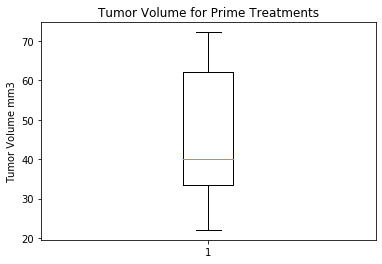

In [11]:
T = final_treatment['Tumor Volume (mm3)']
T
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Prime Treatments')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(T)
plt.show()

In [12]:
quartiles = T.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 33.48002734
The upper quartile of tumor size is: 62.14221369
The interquartile range of tumor size is: 28.66218635
The the median of tumor size is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


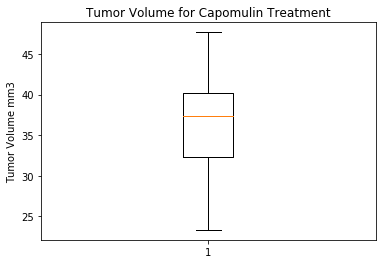

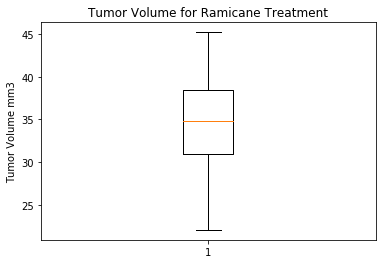

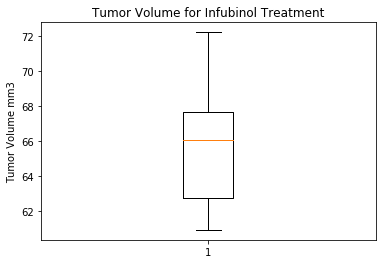

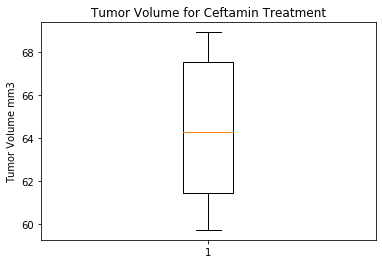

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = final_treatment.loc[(final_treatment['Drug Regimen']=='Capomulin'),['Tumor Volume (mm3)']]
Ramicane = final_treatment.loc[(final_treatment['Drug Regimen']=='Ramicane'),['Tumor Volume (mm3)']]
Infubinol = final_treatment.loc[(final_treatment['Drug Regimen']=='Infubinol'),['Tumor Volume (mm3)']]
Ceftamin = final_treatment.loc[(final_treatment['Drug Regimen']=='Ceftamin'),['Tumor Volume (mm3)']]

c = Capomulin['Tumor Volume (mm3)']
r = Ramicane['Tumor Volume (mm3)']
i = Infubinol['Tumor Volume (mm3)']
ce = Ceftamin['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin Treatment')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(c)
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Tumor Volume for Ramicane Treatment')
ax2.set_ylabel('Tumor Volume mm3')
ax2.boxplot(r)
plt.show()

fig3, ax3 = plt.subplots()
ax3.set_title('Tumor Volume for Infubinol Treatment')
ax3.set_ylabel('Tumor Volume mm3')
ax3.boxplot(i)
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_title('Tumor Volume for Ceftamin Treatment')
ax4.set_ylabel('Tumor Volume mm3')
ax4.boxplot(ce)
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 's185 Recovery Case')

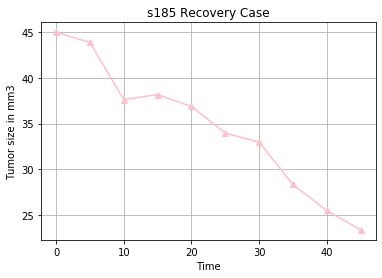

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 = mouse.loc[(mouse['Mouse ID']=='s185')]
x = s185['Timepoint']
y = s185['Tumor Volume (mm3)']
plt.plot(x,y,marker='^',color = 'pink')
plt.ylabel('Tumor size in mm3')
plt.xlabel('Time')
plt.grid()
plt.title('s185 Recovery Case')

Text(0, 0.5, 'Tumor Volume in mm3')

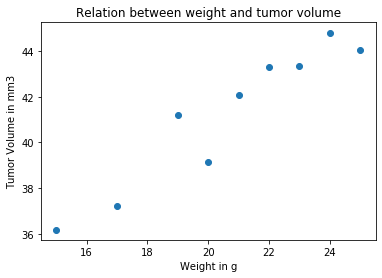

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin= mouse.loc[(mouse['Drug Regimen']=='Capomulin')]
capomulin = capomulin.groupby(['Weight (g)']).mean()
capomulin = capomulin.reset_index()
x = capomulin['Weight (g)']
y = capomulin['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.title('Relation between weight and tumor volume')
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')


In [54]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

correlation coefficient is 0.95
the r squared is: 0.9034966277438606


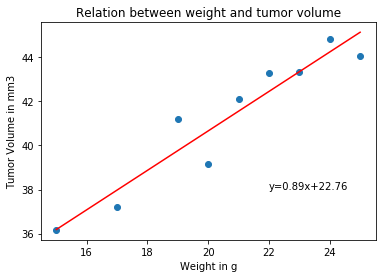

In [69]:
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title('Relation between weight and tumor volume')
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(22,38))
print(f'the r squared is: {rvalue**2}')